<a href="https://colab.research.google.com/github/Reem-Aboutaleb/multimodal-stress-detection/blob/main/04_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.44      0.67      0.53         6
           2       0.00      0.00      0.00         4

    accuracy                           0.40        15
   macro avg       0.37      0.36      0.34        15
weighted avg       0.40      0.40      0.38        15



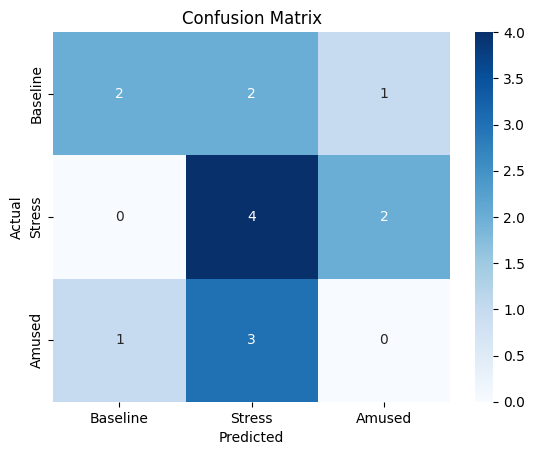

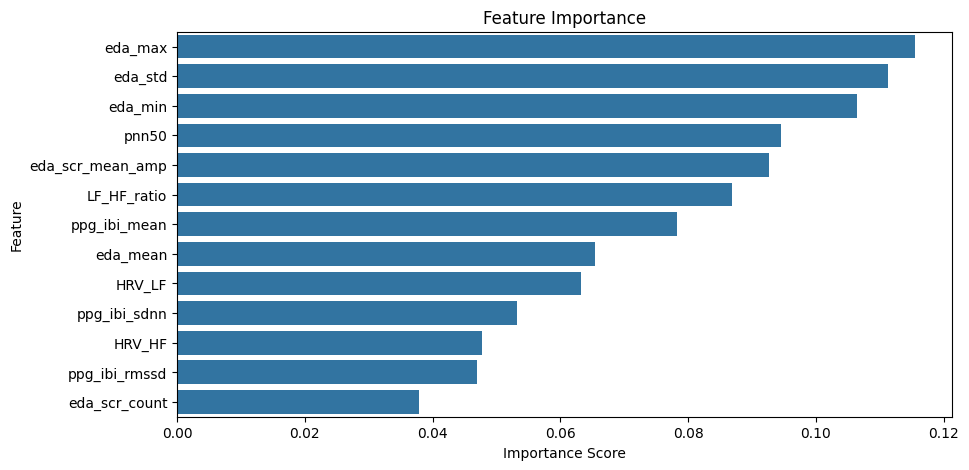

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the extracted advanced features CSV
df = pd.read_csv("extracted_features_advanced.csv")

# Simulate 50 slightly varied rows using Gaussian noise
rows = []
for i in range(50):
    noisy_row = df.iloc[0].copy()
    noise = np.random.normal(0, 0.1, len(noisy_row))
    noisy_row += noise
    rows.append(noisy_row)

df = pd.DataFrame(rows)
df['label'] = [0]*17 + [1]*17 + [2]*16  # Balanced across 3 classes

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Baseline', 'Stress', 'Amused'],
            yticklabels=['Baseline', 'Stress', 'Amused'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


